# EE-769 Term Project
## Presenters: 
Abdul Wajed  Farhat
    (Department of Civil Engineering)
    22D0306@iitb.ac.in

Omar Kashmar
    (Department of Aerospace Engineering)
    213011004@iitb.ac.in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import History

C:\Users\Abdul Wajed Farhat\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# for debugging the errors:
# In case some attributes are not showing in your notebook, please-
# uncomment and run one of these commands:

# !pip install tensorflow --upgrade
#!pip install keras==2.10.0

In [3]:
data=pd.read_csv('D:\\ADANIPORTS.csv')
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [4]:
Date=pd.to_datetime(data['Date'])
Date

0      2007-11-27
1      2007-11-28
2      2007-11-29
3      2007-11-30
4      2007-12-03
          ...    
3317   2021-04-26
3318   2021-04-27
3319   2021-04-28
3320   2021-04-29
3321   2021-04-30
Name: Date, Length: 3322, dtype: datetime64[ns]

(3322,)


Text(0.5, 1.0, 'Previous Close Time Series Data')

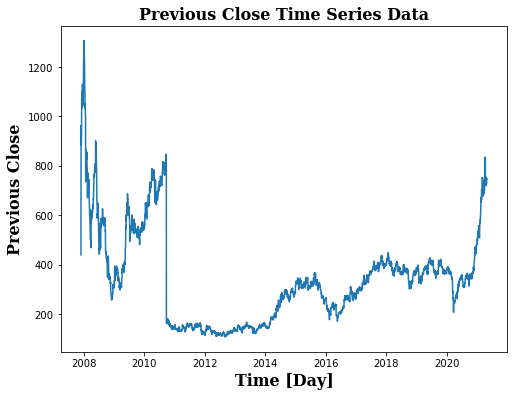

In [5]:
plt.figure(figsize=(8,6))
df=data['Prev Close']
print(df.shape)
plt.plot(Date, df)

plt.xlabel('Time [Day]',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Previous Close',fontsize=16, fontweight='bold',fontfamily='serif')
plt.title('Previous Close Time Series Data',fontsize=16, fontweight='bold',fontfamily='serif')

In [6]:
df=np.array(df).reshape(-1,1)
df.shape

(3322, 1)

In [7]:
train=df[:round(0.75*len(df))]
val=df[round(0.75*len(df)):round(0.85*len(df))]
test=df[round(0.85*len(df)):]
train.shape,val.shape, test.shape

((2492, 1), (332, 1), (498, 1))

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [9]:
# Normalizing the data by Min and Max scaler
scaler.fit(df)
train=scaler.transform(train)
val=scaler.transform(val)
test=scaler.transform(test)

In [10]:
# For Phase space reconstruction 

def create_dataset(data,n_features):

    X,Y=[],[]

    for i in range (len(data)-n_features-1) :
        
        a=data[i:i+n_features,0:data.shape[1]]
        X.append(a)
        Y.append(data[i+n_features,0])
        
    return (np.array(X),np.array(Y))

In [11]:
x_train,y_train=create_dataset(train,1)
x_val,y_val=create_dataset(val,1)
x_test,y_test=create_dataset(test,1)

In [12]:
print (x_train.shape,y_train.shape)
print (x_val.shape,y_val.shape)
print(x_test.shape, y_test.shape)

(2490, 1, 1) (2490,)
(330, 1, 1) (330,)
(496, 1, 1) (496,)


In [13]:
def lstm_model(x_train,y_train,x_val,y_val,x_test,y_test,Nepochs,batchsize):
    model=Sequential()
    model.add(LSTM(100,activation='relu',return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
    model.add(LSTM(100,activation='relu',return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(1,'linear'))
    #Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # For getting the history of the data
    history=History()
    # Fit the model
    model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=Nepochs,batch_size=batchsize,callbacks=[history])
    # And predict for test data
    yp=model.predict(x_test)
    
    ls=history.history['loss']
    
    print(model.summary())
    
    return (yp,ls)

In [14]:
y_pred,loss=lstm_model(x_train,y_train,x_val,y_val,x_test,y_test,100,100)

Epoch 1/100
25/25 [==============================] - 9s 50ms/step - loss: 0.0471 - val_loss: 0.0057
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0284 - val_loss: 7.7400e-04
Epoch 3/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0195 - val_loss: 2.2583e-04
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0040 - val_loss: 8.9084e-04
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 8.6071e-04 - val_loss: 5.4788e-04
Epoch 6/100
25/25 [==============================] - 0s 13ms/step - loss: 5.3725e-04 - val_loss: 8.5397e-05
Epoch 7/100
25/25 [==============================] - 0s 12ms/step - loss: 4.1780e-04 - val_loss: 4.1449e-05
Epoch 8/100
25/25 [==============================] - 0s 18ms/step - loss: 3.6508e-04 - val_loss: 5.0938e-05
Epoch 9/100
25/25 [==============================] - 0s 17ms/step - loss: 3.4807e-04 - val_loss: 6.0956e-05
Epoch 10/100
25/25 [============================

25/25 [==============================] - 0s 13ms/step - loss: 3.1198e-04 - val_loss: 4.1198e-05
Epoch 77/100
25/25 [==============================] - 0s 12ms/step - loss: 3.1333e-04 - val_loss: 5.0701e-05
Epoch 78/100
25/25 [==============================] - 0s 12ms/step - loss: 3.1643e-04 - val_loss: 7.5539e-05
Epoch 79/100
25/25 [==============================] - 1s 21ms/step - loss: 3.2514e-04 - val_loss: 1.4616e-04
Epoch 80/100
25/25 [==============================] - 0s 15ms/step - loss: 3.4869e-04 - val_loss: 6.1030e-05
Epoch 81/100
25/25 [==============================] - 0s 13ms/step - loss: 3.1892e-04 - val_loss: 4.4782e-05
Epoch 82/100
25/25 [==============================] - 0s 13ms/step - loss: 3.2960e-04 - val_loss: 5.1724e-05
Epoch 83/100
25/25 [==============================] - 0s 13ms/step - loss: 3.2055e-04 - val_loss: 5.3559e-05
Epoch 84/100
25/25 [==============================] - 0s 13ms/step - loss: 3.1633e-04 - val_loss: 5.3384e-05
Epoch 85/100
25/25 [============

     Prediction  Actual
0    389.405212  391.75
1    391.975708  392.80
2    393.055664  395.30
3    395.628174  387.25
4    387.349823  379.80
..          ...     ...
491  712.963379  737.80
492  729.301697  725.35
493  717.670959  730.75
494  722.713745  749.15
495  739.927124  746.25

[496 rows x 2 columns]


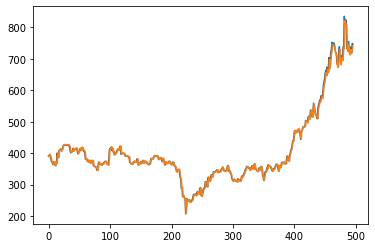

In [15]:
ytest=scaler.inverse_transform(y_test.reshape(-1,1))
ypred=scaler.inverse_transform(y_pred.reshape(-1,1))
print(pd.DataFrame(data={'Prediction':ypred[:,0],'Actual':ytest[:,0]}))
plt.plot(ytest)
plt.plot(ypred)

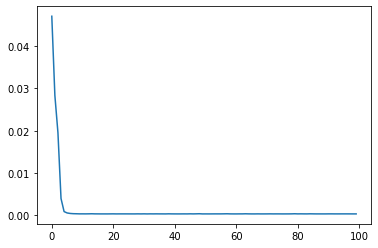

In [16]:
plt.plot(loss)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
print ('Mean Squared error of model:',mean_squared_error(ypred,ytest))
print ('R Squared error of model:',r2_score(ytest,ypred))

Mean Squared error of model: 134.85547837340894
R Squared error of model: 0.9905413413729964


#### Comments:
The model above has been trianed and predicted based on 1 time step and one dimensional data set. After 1000 epochs the model gives an accuracy of 0.99 R-Squared value. So we will look into two more different scenarios in which we will see how will the model perform when we increase the number of time steps and also for the next trial we will run the model for different number of dimensions. 

# Forecasting for higher time steps

In [18]:
x_train,y_train=create_dataset(train,7)
x_val,y_val=create_dataset(val,7)
x_test,y_test=create_dataset(test,7)

In [19]:
y_pred,loss=lstm_model(x_train,y_train,x_val,y_val,x_test,y_test,100,100)

Epoch 1/100
25/25 [==============================] - 8s 84ms/step - loss: 0.0227 - val_loss: 4.3171e-04
Epoch 2/100
25/25 [==============================] - 1s 44ms/step - loss: 0.0020 - val_loss: 1.3324e-04
Epoch 3/100
25/25 [==============================] - 1s 57ms/step - loss: 0.0011 - val_loss: 1.4429e-04
Epoch 4/100
25/25 [==============================] - 1s 48ms/step - loss: 0.0011 - val_loss: 1.7236e-04
Epoch 5/100
25/25 [==============================] - 1s 59ms/step - loss: 0.0011 - val_loss: 2.6907e-04
Epoch 6/100
25/25 [==============================] - 1s 46ms/step - loss: 0.0010 - val_loss: 4.5689e-04
Epoch 7/100
25/25 [==============================] - 1s 39ms/step - loss: 0.0010 - val_loss: 1.6483e-04
Epoch 8/100
25/25 [==============================] - 1s 38ms/step - loss: 9.9547e-04 - val_loss: 1.2976e-04
Epoch 9/100
25/25 [==============================] - 1s 38ms/step - loss: 9.9534e-04 - val_loss: 1.3824e-04
Epoch 10/100
25/25 [==============================] - 1s

25/25 [==============================] - 1s 40ms/step - loss: 2.9373e-04 - val_loss: 1.3694e-04
Epoch 77/100
25/25 [==============================] - 1s 40ms/step - loss: 2.9312e-04 - val_loss: 4.9030e-05
Epoch 78/100
25/25 [==============================] - 1s 40ms/step - loss: 3.4238e-04 - val_loss: 4.7239e-05
Epoch 79/100
25/25 [==============================] - 1s 41ms/step - loss: 3.1835e-04 - val_loss: 1.0369e-04
Epoch 80/100
25/25 [==============================] - 1s 40ms/step - loss: 2.6573e-04 - val_loss: 4.7114e-05
Epoch 81/100
25/25 [==============================] - 1s 40ms/step - loss: 2.6294e-04 - val_loss: 5.0530e-05
Epoch 82/100
25/25 [==============================] - 1s 40ms/step - loss: 2.5321e-04 - val_loss: 5.8055e-05
Epoch 83/100
25/25 [==============================] - 1s 41ms/step - loss: 2.6173e-04 - val_loss: 6.8247e-05
Epoch 84/100
25/25 [==============================] - 1s 44ms/step - loss: 2.6452e-04 - val_loss: 3.1552e-04
Epoch 85/100
25/25 [============

     Prediction  Actual
0    373.378723  369.80
1    368.747498  363.90
2    363.731750  372.55
3    366.802734  364.75
4    364.366486  370.55
..          ...     ...
485  704.769958  737.80
486  720.539001  725.35
487  711.359253  730.75
488  716.282654  749.15
489  733.349487  746.25

[490 rows x 2 columns]


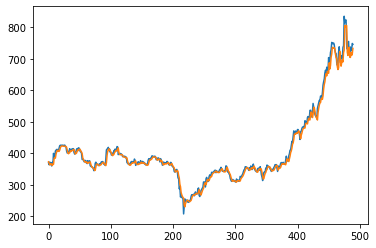

In [20]:
ytest=scaler.inverse_transform(y_test.reshape(-1,1))
ypred=scaler.inverse_transform(y_pred.reshape(-1,1))
print(pd.DataFrame(data={'Prediction':ypred[:,0],'Actual':ytest[:,0]}))
plt.plot(ytest)
plt.plot(ypred)

Mean Squared error of model: 169.78206498945184
R Squared error of model: 0.9882299177700336


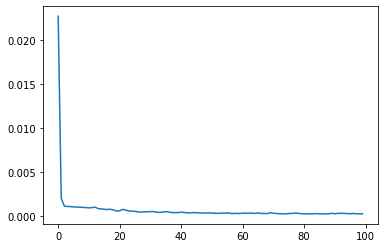

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
print ('Mean Squared error of model:',mean_squared_error(ypred,ytest))
print ('R Squared error of model:',r2_score(ytest,ypred))
plt.plot(loss)

# Forecasting utilizing other features in the data

In [22]:
data.isna().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [23]:
#Since column Trades has huge number of NaN values cells, we will drop that column. Also the columns which we will-
# not need for further process we can delete them as well
newdata=data.drop(['Trades','Date','Symbol','Series','Deliverable Volume'
                  ,'Volume','Turnover','%Deliverble'],axis=1)
newdata.isna().sum()

Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
dtype: int64

In [24]:
#scalling the data
newdata=np.array(newdata)
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale=scale.fit(newdata)
newdata=scale.transform(newdata)

In [25]:
x,y=create_dataset(newdata,7)
x.shape,y.shape

((3314, 7, 7), (3314,))

In [26]:
#splitting the data into train, validation and test data
x_train,y_train=x[:round(0.75*len(x))],y[:round(0.75*len(y))]

x_val,y_val=x[ round(0.75*len(x)):round(0.85*len(x))],y[ round(0.75*len(y)):round(0.85*len(y))]

x_test,y_test=x[ round(0.85*len(x)): ],y[ round(0.85*len(y)):]

x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((2486, 7, 7), (2486,), (331, 7, 7), (331,), (497, 7, 7), (497,))

In [27]:
ypredicted,losses=lstm_model(x_train,y_train,x_val,y_val,x_test,y_test,100,100)

Epoch 1/100
25/25 [==============================] - 8s 87ms/step - loss: 0.3284 - val_loss: 0.0057
Epoch 2/100
25/25 [==============================] - 1s 40ms/step - loss: 0.0416 - val_loss: 0.0053
Epoch 3/100
25/25 [==============================] - 1s 42ms/step - loss: 0.0283 - val_loss: 0.0043
Epoch 4/100
25/25 [==============================] - 1s 43ms/step - loss: 0.0171 - val_loss: 0.0032
Epoch 5/100
25/25 [==============================] - 1s 42ms/step - loss: 0.0147 - val_loss: 0.0041
Epoch 6/100
25/25 [==============================] - 1s 42ms/step - loss: 0.0159 - val_loss: 0.0034
Epoch 7/100
25/25 [==============================] - 1s 42ms/step - loss: 0.0112 - val_loss: 0.0028
Epoch 8/100
25/25 [==============================] - 1s 43ms/step - loss: 0.0093 - val_loss: 0.0031
Epoch 9/100
25/25 [==============================] - 1s 56ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 10/100
25/25 [==============================] - 1s 41ms/step - loss: 0.0064 - val_loss: 0.0024

Epoch 79/100
25/25 [==============================] - 1s 49ms/step - loss: 9.7918e-05 - val_loss: 4.4985e-05
Epoch 80/100
25/25 [==============================] - 1s 51ms/step - loss: 1.5322e-04 - val_loss: 4.0547e-05
Epoch 81/100
25/25 [==============================] - 1s 41ms/step - loss: 1.8203e-04 - val_loss: 6.8292e-05
Epoch 82/100
25/25 [==============================] - 1s 41ms/step - loss: 1.4510e-04 - val_loss: 3.5821e-05
Epoch 83/100
25/25 [==============================] - 1s 42ms/step - loss: 1.4115e-04 - val_loss: 7.6996e-05
Epoch 84/100
25/25 [==============================] - 1s 52ms/step - loss: 9.1786e-05 - val_loss: 3.7950e-05
Epoch 85/100
25/25 [==============================] - 1s 56ms/step - loss: 1.2473e-04 - val_loss: 1.4532e-04
Epoch 86/100
25/25 [==============================] - 1s 47ms/step - loss: 1.3404e-04 - val_loss: 3.5655e-05
Epoch 87/100
25/25 [==============================] - 1s 42ms/step - loss: 2.4846e-04 - val_loss: 8.5968e-05
Epoch 88/100
25/25 

     Prediction  Actual
0    388.210602  389.25
1    390.058197  391.75
2    390.502441  392.80
3    394.312805  395.30
4    387.509705  387.25
..          ...     ...
492  739.498718  737.80
493  727.651611  725.35
494  733.803345  730.75
495  753.212708  749.15
496  748.413574  746.25

[497 rows x 2 columns]


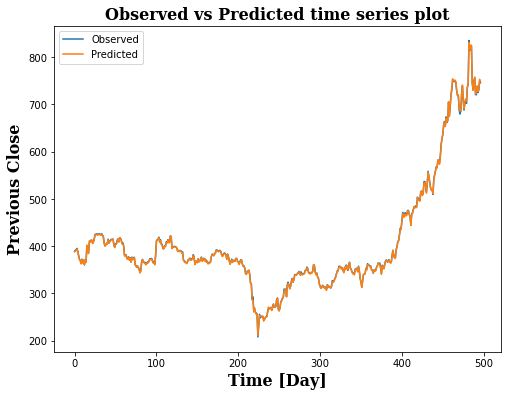

In [28]:
y_test=np.repeat(y_test.reshape(-1,1),newdata.shape[1],axis=-1)
ypredicted=np.repeat(ypredicted,newdata.shape[1],axis=-1)

ytest=scale.inverse_transform(y_test)
ypred=scale.inverse_transform(ypredicted)

print(pd.DataFrame(data={'Prediction':ypred[:,0],'Actual':ytest[:,0]}))

plt.figure(figsize=(8,6))
plt.plot(ytest[:,0])
plt.plot(ypred[:,0])
plt.xlabel('Time [Day]',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Previous Close',fontsize=16, fontweight='bold',fontfamily='serif')
plt.title('Observed vs Predicted time series plot',fontsize=16, fontweight='bold',fontfamily='serif')
plt.legend(['Observed','Predicted'])

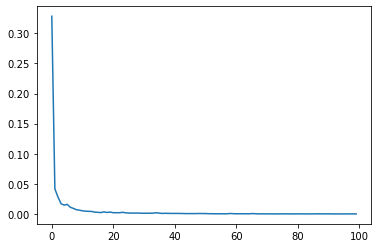

In [29]:
plt.plot(losses)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
print ('Mean Squared error of model:',mean_squared_error(ypred[:,0],ytest[:,0]))
print ('R Squared error of model:',r2_score(ytest,ypred))

Mean Squared error of model: 2.48380210925437
R Squared error of model: 0.9998254460853971


In [31]:
dd=np.insert(df,0,np.array(Date),axis=1)
dd.shape

(3322, 2)

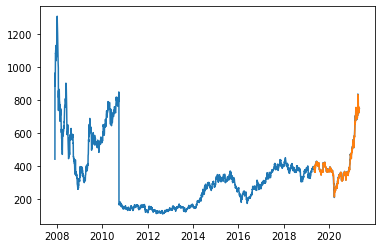

In [32]:
plt.plot(Date,dd[:,1])
plt.plot(Date[-len(ypred):],ypred[:,0])